In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Read and merge the data

In [2]:
DATA_PATH = 'data/'
JOB_POSTINGS_PATH = DATA_PATH + 'gsearch_jobs.csv'
COMPANIES_PATH = DATA_PATH + 'companies.csv'
INDUSTRIES_PATH = DATA_PATH + 'industries.csv'
COMPANY_INDUSTRY_PATH = DATA_PATH + 'company_industries.csv'
EMPLOYEE_COUNTS_PATH = DATA_PATH + 'employee_counts.csv'
JOB_LEVEL_VERIFY_PATH = DATA_PATH + 'verify_job_level_extraction.csv'
PROCESSED_DATA_PATH = DATA_PATH + 'dataframe_after_preprocessing.csv'

In [3]:
df = pd.read_csv(JOB_POSTINGS_PATH, index_col=0)
df.drop(columns=['index'], inplace=True)

In [4]:
df_nondupe = df.drop_duplicates(subset=['title', 'company_name', 'location', 'description'])
print('There are', len(df_nondupe), 'non-duplicate job postings.')
non_empty_count = df['salary_standardized'].notnull() & (df['salary_standardized'] != '')
non_empty_count = non_empty_count.sum()
print('In which there are', non_empty_count, 'postings with non-empty salary attribute.')

There are 41379 non-duplicate job postings.
In which there are 9125 postings with non-empty salary attribute.


In [5]:
df.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens'],
      dtype='object')

In [6]:
companies = pd.read_csv(COMPANIES_PATH)
industries = pd.read_csv(INDUSTRIES_PATH)
company_industries = pd.read_csv(COMPANY_INDUSTRY_PATH)
employee_counts = pd.read_csv(EMPLOYEE_COUNTS_PATH)

In [7]:
companies.columns

Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url'],
      dtype='object')

In [8]:
companies.rename(columns={'description': 'company_description'}, inplace = True)

In [9]:
df_merged = pd.merge(df_nondupe, companies, left_on='company_name', right_on='name', how='left')
df_merged['company_id'] = df_merged['company_id'].apply(lambda x: int(x) if pd.notnull(x) else np.nan)
df_merged = pd.merge(df_merged, company_industries, on='company_id', how='left')

In [10]:
df_merged.columns

Index(['title', 'company_name', 'location', 'via', 'description', 'extensions',
       'job_id', 'thumbnail', 'posted_at', 'schedule_type', 'work_from_home',
       'salary', 'search_term', 'date_time', 'search_location', 'commute_time',
       'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max',
       'salary_hourly', 'salary_yearly', 'salary_standardized',
       'description_tokens', 'company_id', 'name', 'company_description',
       'company_size', 'state', 'country', 'city', 'zip_code', 'address',
       'url', 'industry'],
      dtype='object')

In [11]:
non_empty_count = df_merged['company_id'].notnull() & (df_merged['company_id'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the basic information of company.')
non_empty_count = df_merged['industry'].notnull() & (df_merged['industry'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with the industry information of company.')

There are 18366 out of 41622 job postings with the basic information of company.
There are 18282 out of 41622 job postings with the industry information of company.


In [12]:
non_empty_count = df_merged['description'].notnull() & (df_merged['description'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with non-empty job description.')

There are 41622 out of 41622 job postings with non-empty job description.


In [13]:
df_merged.head()

,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,schedule_type,...,name,company_description,company_size,state,country,city,zip_code,address,url,industry
0,Data Analyst,Cisco Meraki,Anywhere,via LinkedIn,"As the leader in cloud-managed IT, Cisco Merak...","['22 hours ago', 'Work from home', 'Full-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,22 hours ago,Full-time,...,Cisco Meraki,"At Cisco Meraki, we create intuitive technolog...",5.0,California,US,San Francisco,94158,500 Terry A. Francois Blvd,https://www.linkedin.com/company/cisco-meraki,Software Development
1,Entry Level - Business Data Analyst (Remote),Midwest Staffing,Anywhere,via LinkedIn,As a Senior Business Analyst you will contribu...,"['53 minutes ago', 'Work from home', 'Full-tim...",eyJqb2JfdGl0bGUiOiJFbnRyeSBMZXZlbCAtIEJ1c2luZX...,https://encrypted-tbn0.gstatic.com/images?q=tb...,53 minutes ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data Analyst/Researcher,"Amyx, Inc.",United States,via Indeed,Overview:\n\nAmyx is seeking to hire a Data An...,"['3 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QvUmVzZWFyY2...,NaN,3 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data analyst/AI expert to help build a website...,Upwork,Anywhere,via Upwork,I am looking for someone to help me build an A...,"['23 hours ago', 'Work from home', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIGFuYWx5c3QvQUkgZXhwZX...,NaN,23 hours ago,Contractor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data Analyst,Bank Street College of Education,United States,via Higher Education Recruitment Consortium (H...,Position Vacancy – Data Analyst to support the...,"['20 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,20 hours ago,Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Split salary into pay and rate
df_merged[['salary_pay', 'salary_rate']] = df_merged['salary'].str.split(pat=' ', n=1, expand=True)

# Clean salary_pay by removing commas, dollar signs, and spaces
df_merged['salary_pay'] = df_merged['salary_pay'].str.replace(',', '').str.replace('$', '').str.replace(' ', '')

# Handle salary ranges and convert to numeric
df_merged['salary_avg'] = np.where(df_merged['salary_pay'].str.contains("–"), np.nan, df_merged['salary_pay'])
df_merged['salary_min'] = np.where(df_merged['salary_pay'].str.contains("–"), df_merged['salary_pay'], np.nan)
df_merged[['salary_min', 'salary_max']] = df_merged.salary_min.str.split(pat="–", n=1, expand=True)

# Convert K to thousands and handle numeric conversion
for column in ['salary_avg', 'salary_min', 'salary_max']:
    df_merged[column] = df_merged[column].str.replace("K", "000")
    df_merged[column] = pd.to_numeric(df_merged[column], errors='coerce')

# Calculate average salary for ranges
df_merged['salary_avg'] = np.where(df_merged['salary_min'].notnull(),
                                   (df_merged['salary_min'] + df_merged['salary_max']) / 2,
                                   df_merged['salary_avg'])

# Calculate hourly and yearly salaries
df_merged['salary_hourly'] = np.where(df_merged['salary_rate'] == 'an hour', df_merged['salary_avg'], np.nan)
df_merged['salary_yearly'] = np.where(df_merged['salary_rate'] == 'a year', df_merged['salary_avg'], np.nan)

# Standardize salary to annual
salary_rate = {'a year': 1, 'an hour': 2080, 'a month': 12}
df_merged['salary_standardized'] = df_merged.apply(
    lambda row: row['salary_avg'] * salary_rate.get(row['salary_rate'], np.nan) if pd.notnull(row['salary_avg']) else np.nan,
    axis=1
)

# Used to check results as built above
salary_df = df_merged[~df_merged['salary'].isnull()]
salary_df = salary_df[['company_name', 'salary', 'salary_pay', 'salary_rate', 'salary_avg', 'salary_min', 'salary_max', 'salary_standardized', 'salary_hourly', 'salary_yearly']]
pd.set_option('display.max_rows', salary_df.shape[0]+1)
salary_df.head(10)

,company_name,salary,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_standardized,salary_hourly,salary_yearly
5,Marathon TS,80K–90K a year,80K–90K,a year,85000.0,80000.0,90000.0,85000.0,NaN,85000.0
18,Upwork,20–40 an hour,20–40,an hour,30.0,20.0,40.0,62400.0,30.0,NaN
22,Insight Global,40–65 an hour,40–65,an hour,52.5,40.0,65.0,109200.0,52.5,NaN
47,Upwork,75–125 an hour,75–125,an hour,100.0,75.0,125.0,208000.0,100.0,NaN
57,Upwork,75–100 an hour,75–100,an hour,87.5,75.0,100.0,182000.0,87.5,NaN
67,Mastermind.com,90K–110K a year,90K–110K,a year,100000.0,90000.0,110000.0,100000.0,NaN,100000.0
135,Upwork,40–75 an hour,40–75,an hour,57.5,40.0,75.0,119600.0,57.5,NaN
141,OQ Point LLC,43–48 an hour,43–48,an hour,45.5,43.0,48.0,94640.0,45.5,NaN
146,Upwork,17–46 an hour,17–46,an hour,31.5,17.0,46.0,65520.0,31.5,NaN
188,Upwork,40–75 an hour,40–75,an hour,57.5,40.0,75.0,119600.0,57.5,NaN


## Data Cleaning and EDA

In [15]:
# Remove leading and trailing spaces
df_merged['location'] = df_merged['location'].str.strip()

# Standardize the format (e.g., remove extra spaces within the string)
df_merged['location'] = df_merged['location'].str.replace(r'\s+', ' ', regex=True)

# Clean skills
df_merged['description_tokens'] = df_merged['description_tokens'].apply(lambda x: re.findall(r"'(.*?)'", x))

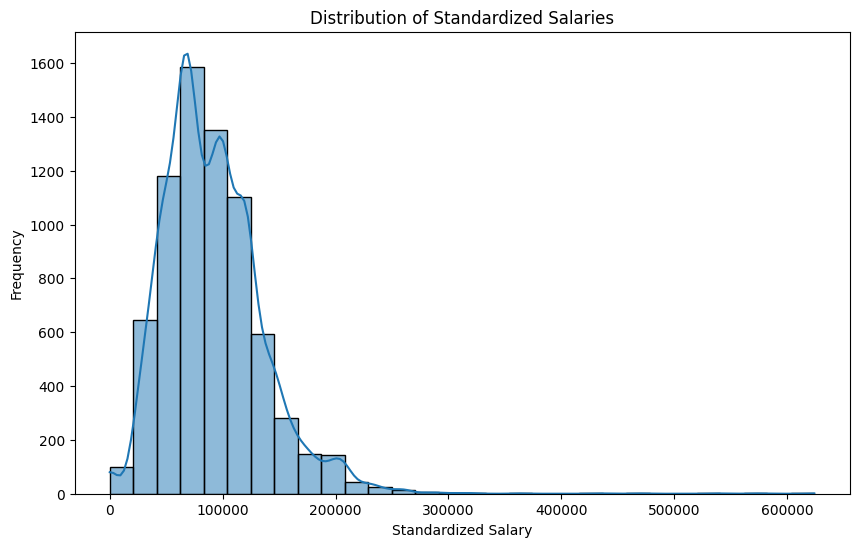

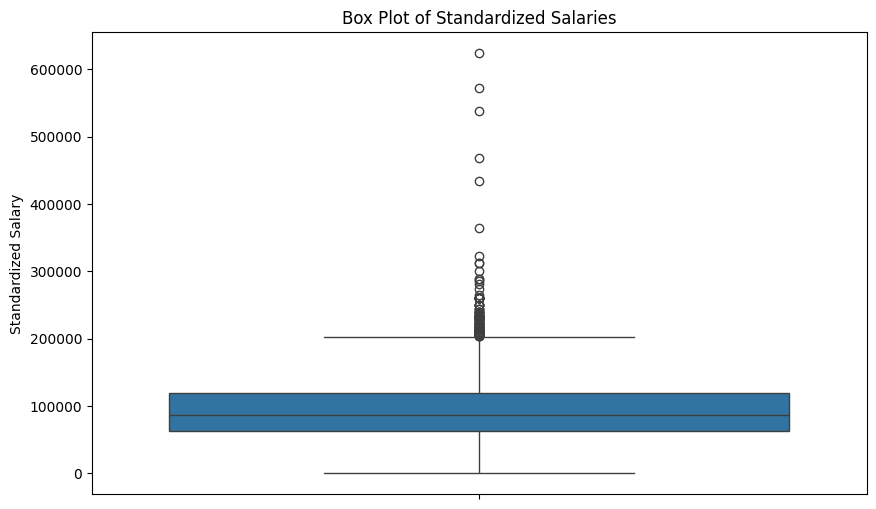

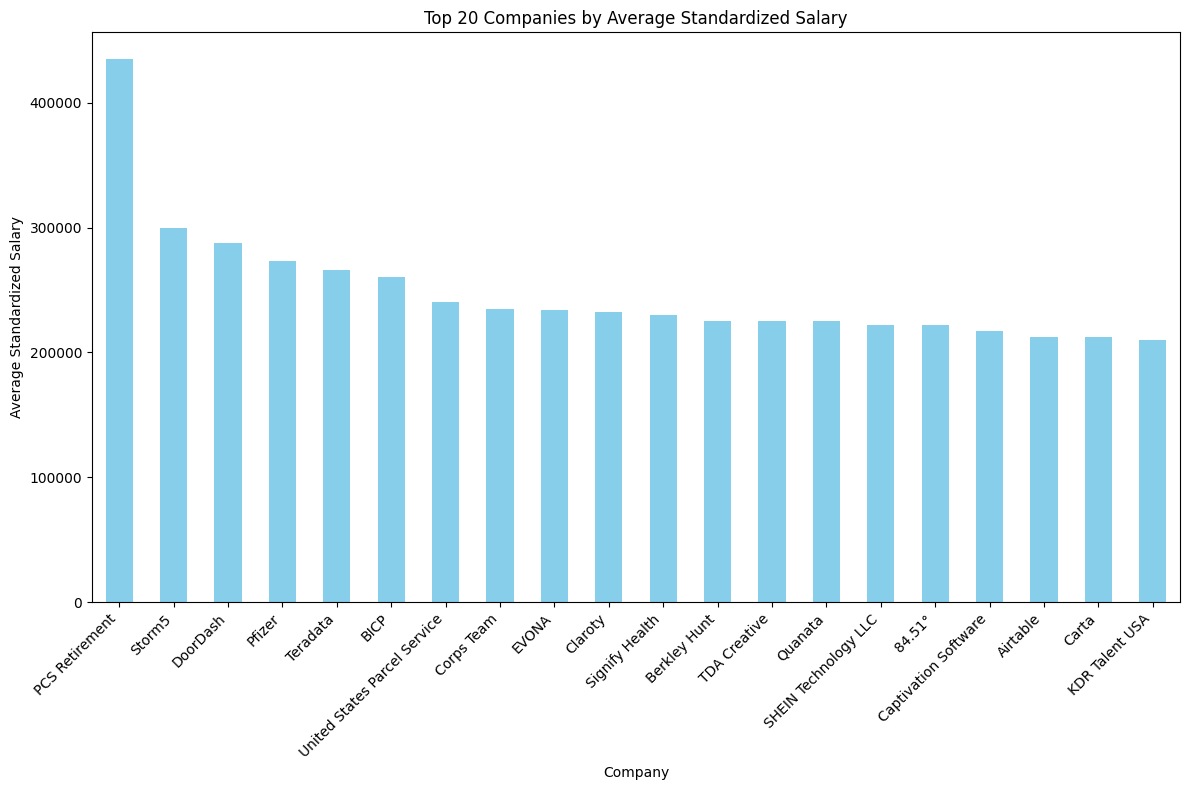

In [16]:
# Histogram of Salary Standardized
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['salary_standardized'], bins=30, kde=True)
plt.xlabel('Standardized Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Salaries')
plt.show()

# Box Plot of Salary Standardized
plt.figure(figsize=(10, 6))
sns.boxplot(y=salary_df['salary_standardized'])
plt.ylabel('Standardized Salary')
plt.title('Box Plot of Standardized Salaries')
plt.show()

# Bar Plot of Average Salary by Company
average_salary_by_company = salary_df.groupby('company_name')['salary_standardized'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
average_salary_by_company.plot(kind='bar', color='skyblue')
plt.xlabel('Company')
plt.ylabel('Average Standardized Salary')
plt.title('Top 20 Companies by Average Standardized Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
df_merged[['salary_avg', 'salary_min', 'salary_max', 'salary_standardized']].describe()

,salary_avg,salary_min,salary_max,salary_standardized
count,7219.000000,6784.000000,6784.000000,7219.000000
mean,36801.064758,29139.207127,44651.996123,91531.368368
std,53173.869806,44229.235658,64630.722831,44536.232573
min,2.100000,1.800000,2.400000,25.200000
25%,32.427500,18.460000,45.000000,62400.000000
50%,57.500000,44.550000,75.000000,86320.000000
75%,80500.000000,69983.500000,100000.000000,118560.000000
max,434500.000000,275000.000000,850000.000000,624000.000000


In [18]:
def extract_experience(description):
    # Regular expression to find patterns like "X years", "X+ years", "X- years", "X years of experience" 1
    pattern = r'(\d+\s*[\+\-]?\s*years?)'
    # pattern = r'(\d+)\s*[-+]?[\s]*years?[\s]*(?:of\s*experience)?'
    matches = re.findall(pattern, description.lower())
    if matches:
        # Extract the numeric part and convert to integer
        years = [int(re.findall(r'\d+', match)[0]) for match in matches]
        return max(years)  # Return the maximum years of experience found
    return np.nan

# Apply the function to the 'description' column
df_merged['Years_of_Experience'] = df_merged['description'].apply(extract_experience)

# Display the first few rows to check the results
df_merged[['description', 'Years_of_Experience']].head()

,description,Years_of_Experience
0,"As the leader in cloud-managed IT, Cisco Merak...",3.0
1,As a Senior Business Analyst you will contribu...,NaN
2,Overview:\n\nAmyx is seeking to hire a Data An...,5.0
3,I am looking for someone to help me build an A...,NaN
4,Position Vacancy – Data Analyst to support the...,5.0


In [19]:
non_empty_count = df_merged['Years_of_Experience'].notnull() & (df_merged['Years_of_Experience'] != '')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with Years_of_Experience in job description.')

There are 24478 out of 41622 job postings with Years_of_Experience in job description.


In [20]:
correlation = df_merged[['Years_of_Experience', 'salary_standardized']].dropna().corr().iloc[0, 1]
print(f'Correlation between salary and YOE: {correlation}')

Correlation between salary and YOE: -0.04567625424586261


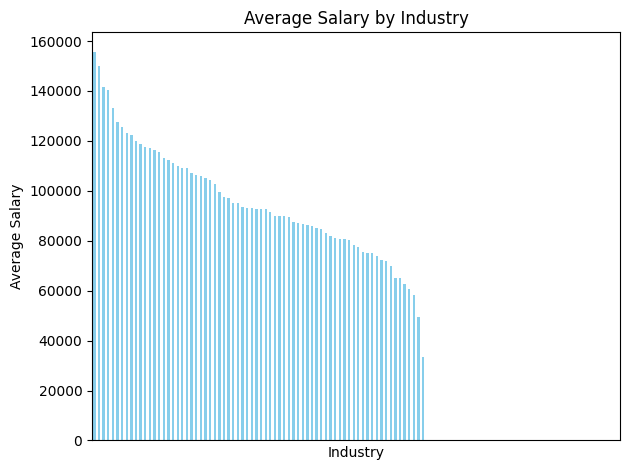

In [21]:
average_salary = df_merged.groupby('industry')['salary_standardized'].mean()
average_salary_sorted = average_salary.sort_values(ascending=False)
average_salary_sorted.plot(kind='bar', color='skyblue')

plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salary by Industry')
plt.xticks([])
plt.tight_layout()

plt.show()

## Findings

### What are the most in-demand skills across industries?

In [22]:
from collections import Counter


# Flatten the list of tokens and count unique values
all_tokens = [token for sublist in df_merged['description_tokens'] for token in sublist]
print(all_tokens[0])
token_counts = Counter(all_tokens)

# Convert to DataFrame for better readability
token_counts_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 20 most common tokens
print(token_counts_df.head(20))

aws
          Token  Count
1           sql  21130
4         excel  13467
12       python  12777
16     power_bi  11768
2       tableau  11337
18            r   7734
9           sas   3602
5    powerpoint   3002
23         word   2954
3         azure   2668
10    snowflake   2512
0           aws   2488
22        spark   2220
13       looker   1856
61           go   1632
41  spreadsheet   1574
19        scala   1527
15          sap   1481
56         spss   1256
51            c   1182


### Which cities have the highest demand for Data Scientists?

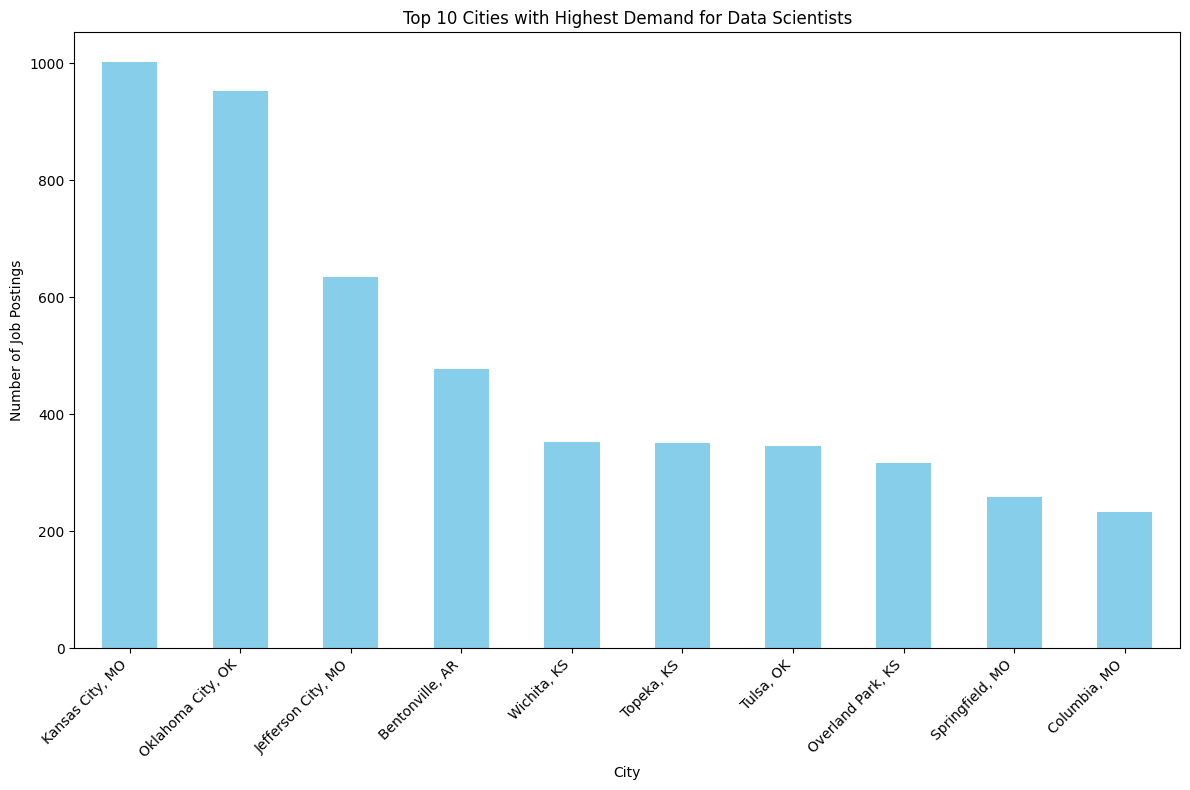

In [23]:
# Count the number of job postings for Data Scientists in each city
# exclude Anywhere and Remote and United States when counting the number of most popular locations
city_demand = df_merged['location'].value_counts().drop(['Anywhere', 'United States']).head(10)

# Plot the top 10 cities with the highest demand for Data Scientists
plt.figure(figsize=(12, 8))
city_demand.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Cities with Highest Demand for Data Scientists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

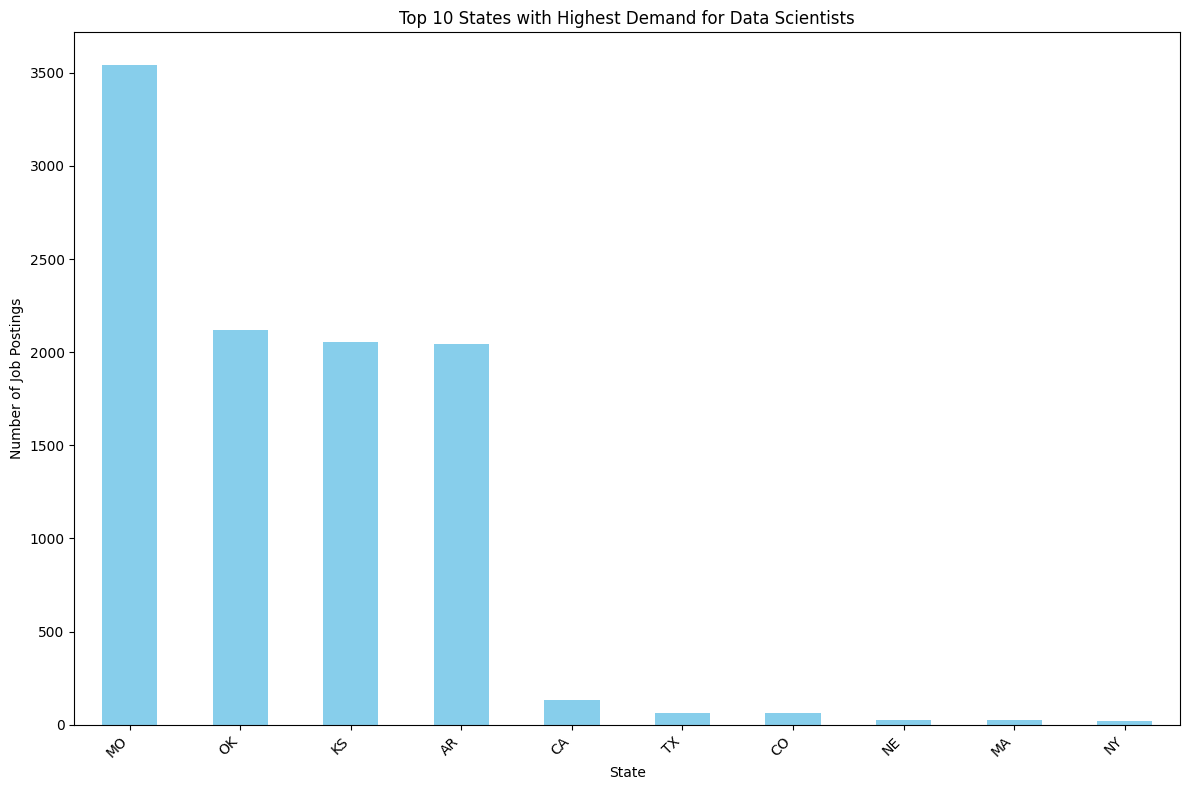

In [24]:
# extract the states from the location
df_merged['state'] = df_merged['location'].str.extract(r',\s*([A-Z]{2})')[0]
# Count the number of job postings for Data Scientists in each state
state_demand = df_merged['state'].value_counts().dropna().head(10)
# Plot the top 10 states with the highest demand for Data Scientists
plt.figure(figsize=(12, 8))
state_demand.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 States with Highest Demand for Data Scientists')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
state_demand

state
MO    3540
OK    2119
KS    2053
AR    2043
CA     131
TX      65
CO      65
NE      24
MA      23
NY      17
Name: count, dtype: int64

### What proportion of job postings are for remote roles? Which industries are leading in remote work adoption?

/tmp/ipykernel_2928428/2389053013.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  remote_jobs = df_merged['work_from_home'].fillna(False).astype(bool)
/tmp/ipykernel_2928428/2389053013.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  remote_by_industry = df_merged.groupby('industry')['work_from_home'].apply(lambda x: x.fillna(False).astype(bool).mean()).sort_values(ascending=False)
/tmp/ipykernel_2928428/2389053013.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Cal

Proportion of job postings that are remote: 48.86%
Top industries leading in remote work adoption:
industry
Freight and Package Transportation               1.000000
Computer Networking Products                     1.000000
Fundraising                                      1.000000
Religious Institutions                           1.000000
Venture Capital and Private Equity Principals    1.000000
Political Organizations                          1.000000
Railroad Equipment Manufacturing                 1.000000
Technology, Information and Internet             0.833333
Software Development                             0.815534
Newspaper Publishing                             0.800000
Name: work_from_home, dtype: float64


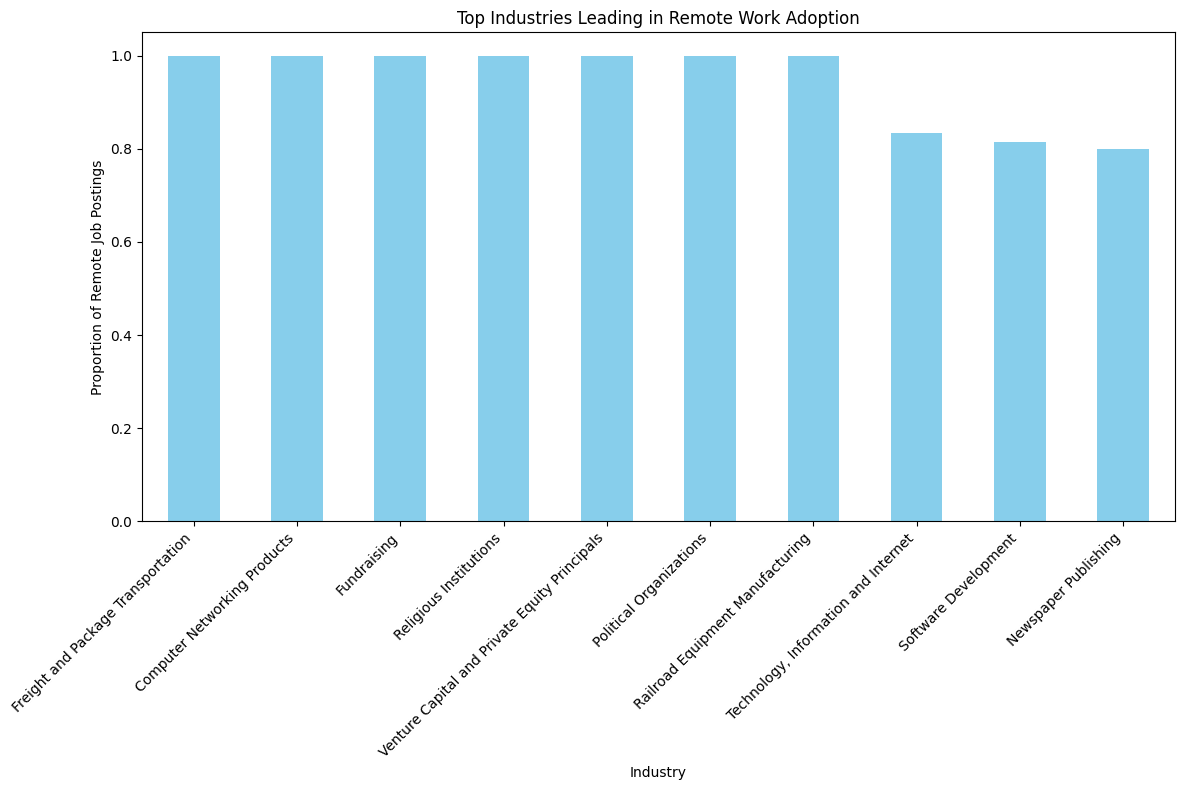

In [26]:
# Calculate the proportion of remote job postings
remote_jobs = df_merged['work_from_home'].fillna(False).astype(bool)
remote_proportion = remote_jobs.mean()
print(f'Proportion of job postings that are remote: {remote_proportion:.2%}')

# Calculate the proportion of remote job postings by industry
remote_by_industry = df_merged.groupby('industry')['work_from_home'].apply(lambda x: x.fillna(False).astype(bool).mean()).sort_values(ascending=False)

# Display the top industries leading in remote work adoption
print('Top industries leading in remote work adoption:')
print(remote_by_industry.head(10))

# Plot the top industries leading in remote work adoption
plt.figure(figsize=(12, 8))
remote_by_industry.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Industry')
plt.ylabel('Proportion of Remote Job Postings')
plt.title('Top Industries Leading in Remote Work Adoption')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What are the seasonal patterns in job postings? What is the basic trend in recent years? Specifically, what about Data Scientist entry level jobs? (decomposition)

/tmp/ipykernel_2928428/3437816491.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_jobs = entry_level_jobs.resample('M', on='date_time').size()


<Figure size 1200x800 with 0 Axes>

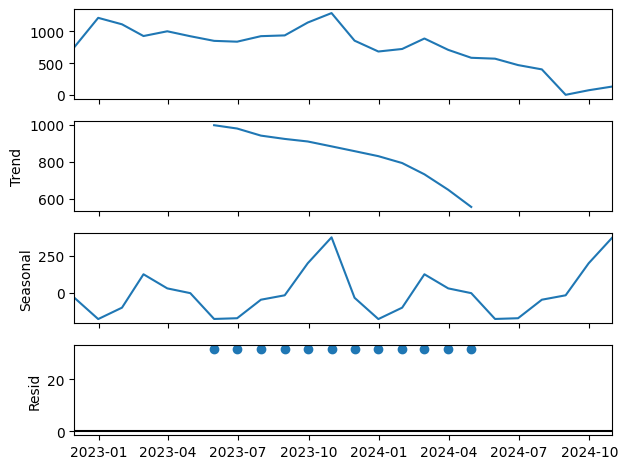

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the date_time column is in datetime format
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])

# Filter for Data Scientist entry-level jobs or 0 - 1 years of experience
entry_level_jobs = df_merged[df_merged['Years_of_Experience'].between(0, 1) | df_merged['Years_of_Experience'].isnull() | (df_merged['description'].str.contains('entry level', case=False))]

# Group by month and count the number of job postings
monthly_jobs = entry_level_jobs.resample('M', on='date_time').size()

# Decompose the time series
decomposition = seasonal_decompose(monthly_jobs, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

## Feature Engineering

### Text-based Features - Job Level

In [28]:
def extract_job_level(description):
    description = description.lower()
    if any(keyword in description for keyword in ['senior', 'lead', 'manager', 'director']):
        return 'Senior'
    elif any(keyword in description for keyword in ['mid-level', 'associate', 'regular']):
        return 'Mid'
    elif any(keyword in description for keyword in ['entry-level', 'junior', 'intern', 'trainee']):
        return 'Entry'
    else:
        return 'Unspecified'
df_merged['job_level'] = df_merged['title'].apply(extract_job_level)
df_merged['job_level'] = df_merged['description'].apply(extract_job_level)

In [29]:
df_merged.loc[(df_merged['job_level'] == 'Unspecified') & (df_merged['Years_of_Experience'].isin([0, 1, 2])), 'job_level'] = 'Entry'

In [30]:
df_merged['job_level'].value_counts()

job_level
Senior         25535
Unspecified    10712
Entry           3280
Mid             2095
Name: count, dtype: int64

In [31]:
non_empty_count = df_merged['job_level'].notnull() & (df_merged['job_level'] != 'Unspecified')
non_empty_count = non_empty_count.sum()
print('There are', non_empty_count, 'out of', len(df_merged), 'job postings with job_level in job description.')

There are 30910 out of 41622 job postings with job_level in job description.


In [32]:
# Verify the job-level extraction
sample_df = df_merged[['title', 'description', 'job_level']].sample(n=30, random_state=42)
sample_df.to_csv(JOB_LEVEL_VERIFY_PATH)

### Clean Salary Data

In [33]:
# fill df_merged salary standardized by job-level and location
print('Number of missing values in salary_standardized before:', df_merged['salary_standardized'].isnull().sum())
salary_standardized_filling = df_merged.groupby(['job_level', 'location'])['salary_standardized'].transform(lambda x: x.fillna(x.mean()))
print('Number of missing values in salary_standardized after:', salary_standardized_filling.isnull().sum())
df_merged['salary_standardized'] = salary_standardized_filling
print('length of df_merged:', len(df_merged))
df_merged.dropna(subset=['salary_standardized'], inplace=True)
print('length of df_merged after dropping NaN:', len(df_merged))


Number of missing values in salary_standardized before: 34403
Number of missing values in salary_standardized after: 2250
length of df_merged: 41622
length of df_merged after dropping NaN: 39372


In [34]:
df_merged = df_merged.reset_index(drop=True)

### Text-based Features - TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(df_merged['description'])

### Categorical Features - Binary Encoding for Industry and Location

In [36]:
# df_merged = pd.get_dummies(df_merged, columns=['industry'], drop_first=True)
# Using the 'category_encoders' library
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['industry', 'location'])
df_merged = encoder.fit_transform(df_merged)

### Numerical Features - Job Description Length

In [37]:
df_merged['average_length'] = df_merged['description'].str.len().mean()

### Numerical Features - Number of Required Technical Skills

In [38]:
df_merged['num_skills'] = df_merged['description_tokens'].apply(len)

### Text-based Features - Soft Skills

In [39]:
# imports
import spacy
from spacy.matcher import PhraseMatcher

# load default skills data base
from skillNer.general_params import SKILL_DB
# import skill extractor
from skillNer.skill_extractor_class import SkillExtractor

# init params of skill extractor
nlp = spacy.load("en_core_web_sm")
# init skill extractor
skill_extractor = SkillExtractor(nlp, SKILL_DB, PhraseMatcher)


/home/xinyumei/miniconda3/envs/si699/lib/python3.11/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


loading full_matcher ...
loading abv_matcher ...
loading full_uni_matcher ...
loading low_form_matcher ...
loading token_matcher ...


In [44]:
import json

with open('skill_db_relax_20.json', 'r') as f:
    json_data = json.load(f)

soft_skills_list = []

soft_skill_types = ["Soft Skill"]

for skill_id, skill_data in json_data.items():
    if skill_data['skill_type'] in soft_skill_types:
        # Add both high and low surface forms to the soft skills list
        soft_skills_list.append(skill_data['skill_name'].lower())

soft_skills_list = list(set(soft_skills_list))
print("Soft Skills List:", soft_skills_list)

Soft Skills List: ['professional networking', 'self starter', 'lifelong learning', 'cultural responsiveness', 'typewriters', 'energetic', 'learning strategies', 'unpacking', 'advocacy', 'sanitation', 'swedish language', 'management', 'recall (memory)', 'microsoft excel', 'mentorship', 'constructive feedback', 'target orientated', 'hawaiian language', 'reservations', 'administrative skills', 'data entry', 'politeness', 'telecommuting', 'information technology', 'improvisation', 'proactivity', 'vietnamese language', 'fine motor skills', 'business proposals', 'social intelligence', 'patience', 'recognizing strengths', 'punctuality', 'cognitive flexibility', 'filing', 'computer literacy', 'quick learning', 'facetime', 'ethical responsibility', 'construction', 'microsoft powerpoint', 'ethical conduct', 'reading comprehension', 'team motivation', 'personal integrity', 'tagalog language', 'basic internet skills', 'rapport building', 'social media', 'depth perception', 'virtual teams', 'urdu l

In [46]:
# Function to find soft skills in each job description
def find_soft_skills(job_description):
    found_skills = [skill for skill in soft_skills_list if skill in job_description.lower()]
    return found_skills

# Apply the function to each job description in the DataFrame
df_merged['required_soft_skills'] = df_merged['description'].apply(find_soft_skills)

print(df_merged[['description', 'required_soft_skills']])

                                             description  \
0      As the leader in cloud-managed IT, Cisco Merak...   
1      As a Senior Business Analyst you will contribu...   
2      Overview:\n\nAmyx is seeking to hire a Data An...   
3      I am looking for someone to help me build an A...   
4      Position Vacancy – Data Analyst to support the...   
...                                                  ...   
39367  Kforce has a client that is seeking a Senior D...   
39368  At Edward Jones, we help clients achieve their...   
39369  At Edward Jones, we help clients achieve their...   
39370  At Edward Jones, we help clients achieve their...   
39371  At Edward Jones, we help clients achieve their...   

                                    required_soft_skills  
0      [collaboration, leadership, innovation, sales,...  
1                    [management, timelines, leadership]  
2                   [microsoft excel, research, writing]  
3                                          

In [47]:
df_merged.to_csv(PROCESSED_DATA_PATH, index=False)

### Baseline models

In [ ]:
df_merged = pd.read_csv(PROCESSED_DATA_PATH)

In [47]:
df_merged.columns

Index(['title', 'company_name', 'location_0', 'location_1', 'location_2',
       'location_3', 'location_4', 'location_5', 'location_6', 'location_7',
       'via', 'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens',
       'company_id', 'name', 'company_description', 'company_size', 'state',
       'country', 'city', 'zip_code', 'address', 'url', 'industry_0',
       'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5',
       'industry_6', 'Years_of_Experience', 'job_level', 'average_length',
       'num_skills'],
      dtype='object')

In [48]:
X = df_merged[['location_0', 'location_1', 'location_2','location_3', 'location_4', 'location_5', 
               'location_6', 'location_7','commute_time', 'company_size', 'industry_0',
               'industry_1', 'industry_2', 'industry_3', 'industry_4', 'industry_5',
               'industry_6', 'Years_of_Experience', 'average_length', 'num_skills']].fillna(0)
y = df_merged['salary_standardized']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=699)

import statsmodels.api as sm 
x2 = sm.add_constant(X_train)
model = sm.OLS(y_train, x2).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     salary_standardized   R-squared:                       0.092
Model:                             OLS   Adj. R-squared:                  0.091
Method:                  Least Squares   F-statistic:                     165.7
Date:                 Fri, 01 Nov 2024   Prob (F-statistic):               0.00
Time:                         23:04:14   Log-Likelihood:            -3.3617e+05
No. Observations:                29529   AIC:                         6.724e+05
Df Residuals:                    29510   BIC:                         6.725e+05
Df Model:                           18                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
location_0           2.0

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, mean_squared_error

# Calculate MSE (for regression or if needed as a performance metric)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 475988673.8850863


In [ ]:
# build a BERT model for job descriptions
from transformers import BertTokenizer, BertModel
import torch
    
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Tokenize the job descriptions
encoded_inputs = tokenizer(df_merged['description'].tolist(), padding=True, truncation=True, return_tensors='pt')
input_ids = encoded_inputs['input_ids'].to(device)
attention_mask = encoded_inputs['attention_mask'].to(device)
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()